## 03 - Geocentric Models

#### Imports

In [1]:
# ruff: noqa: F405
from init_notebook import *

%config InlineBackend.figure_formats = ['svg']

Module aliases imported by init_notebook.py:
--------------------------------------------
import numpy as np

import pandas as pd

import statsmodels.formula.api as smf

import pymc as pm

import xarray as xr

import arviz as az

import utils as utils

from scipy import stats as stats

from matplotlib import pyplot as plt

Watermark:
----------
Last updated: 2025-02-02T12:53:46.911025+04:00

Python implementation: CPython
Python version       : 3.13.1
IPython version      : 8.32.0

Compiler    : Clang 16.0.0 (clang-1600.0.26.4)
OS          : Darwin
Release     : 24.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

numpy      : 1.26.4
xarray     : 2025.1.1
statsmodels: 0.14.4
arviz      : 0.20.0
pandas     : 2.2.3
pymc       : 5.20.0
scipy      : 1.15.1
watermark  : 2.5.0
matplotlib : 3.10.0



#### Introduction

**Linear regression** is the geocentric model of applied statistics. By “linear regression,” we will mean a family of simple statistical golems that attempt to learn about the mean and variance of some measurement, using an additive combination of other measurements. Like geocentrism, linear regression can usefully describe a very large variety of natural phenomena. Like geocentrism, linear regression is a descriptive model that corresponds to many different process models. If we read its structure too literally, we’re likely to make mistakes. But used wisely, these little linear golems continue to be useful.

This notebook introduces linear regression as a Bayesian procedure. Under a probability interpretation, which is necessary for Bayesian work, linear regression uses a Gaussian (normal) distribution to describe our model’s uncertainty about some measurement of interest. This type of model is simple, flexible, and commonplace. Like all statistical models, it is not universally useful. But linear regression has a strong claim to being foundational, in the sense that once you learn to build and interpret linear regression models, you can more easily move on to other types of regression which are less normal.

*Fourier series*, a way of decomposing a periodic function into a series of sine and cosine functions.

#### Why Normal Distributions are Normal

Suppose you and a thousand of your closest friends line up on the halfway line of a soccer field (football pitch). Each of you has a coin in your hand. At the sound of the whistle, you begin flipping the coins. Each time a coin comes up heads, that person moves one step towards the left-hand goal. Each time a coin comes up tails, that person moves one step towards the right-hand goal. Each person flips the coin 16 times, follows the implied moves, and then stands still. Now we measure the distance of each person from the halfway line. Can you predict what proportion of the thousand people who are standing on the halfway line? How about the proportion 5 yards left of the line?

It’s hard to say where any individual person will end up, but you can say with great confidence what the collection of positions will be. The **distances will be distributed in approximately normal, or Gaussian**, fashion. This is true even though the **underlying distribution is binomial**. It does this because there are so many more possible ways to realize a sequence of left-right steps that sums to zero. There are slightly fewer ways to realize a sequence that ends up one step left or right of zero, and so on, with the number of possible sequences declining in the characteristic bell curve of the normal distribution.

##### Normal by Addition

Let’s see this result, by simulating this experiment. To show that there’s nothing special about the underlying coin flip, assume instead that **each step is different from all the others**, a random distance between zero and one yard. Thus a coin is flipped, a distance between zero and one yard is taken in the indicated direction, and the process repeats. To simulate this, we generate for each person a list of 16 random numbers between −1 and 1. These are the individual steps. Then we add these steps together to get the position after 16 steps. Then we need to replicate this procedure 1000 times.

In [182]:
steps = 16
repetitions = 1_000

tosses = np.random.uniform(-1,1,size=(steps,repetitions))
pos = np.zeros((steps+1, repetitions))
pos[1:,:] = np.cumsum(tosses, axis=0)

In [179]:
step_rng = np.random.default_rng(1234)

steps = 16
repetitions = 1000
show_steps = [4, 8, 16]
pos = np.zeros([steps + 1, repetitions])
for i in range(pos.shape[1]):
    pos[1:, i] = np.cumsum(step_rng.uniform(-1, 1, steps))

In [180]:
steps = 16
repetitions = 1_000

tosses = np.random.choice(a=[-1,1], size=(steps,repetitions), replace=True, p=[0.5,0.5])
pos = np.zeros((steps+1, repetitions))
pos[1:,:] = np.cumsum(tosses, axis=0)

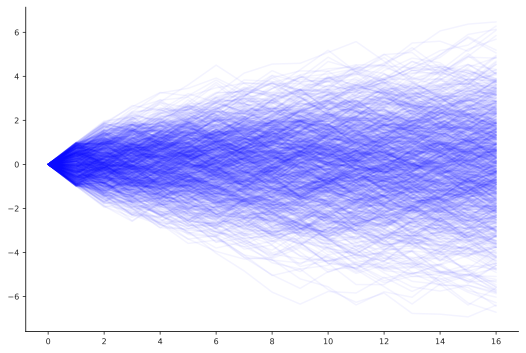

In [183]:
plt.plot(np.arange(0,steps+1), pos, 'b',alpha=0.05);